## LDA

## Linear discriminant analysis

***Abstract***

Linear Discriminant Analysis (LDA) is a very common technique for dimensionality reduction problems as a pre-processing step for machine learning and pattern classiﬁcation applications. At the same time, it is usually used as a black box,but (sometimes) not well understood. The aim of this paper is to build a solid intuition for what is LDA, and how LDA works,thus enabling readers of all levels be able to get a better understanding of the LDA and to know how to apply this technique indifferent applications. The paper ﬁrst gave the basic deﬁnitions and steps of how LDA technique works supported with visualexplanations of these steps. Moreover, the two methods of computing the LDA space, i.e. class-dependent and class-independentmethods, were explained in details. Then, in a step-by-step approach, two numerical examples are demonstrated to show howthe LDA space can be calculated in case of the class-dependent and class-independent methods. Furthermore, two of the mostcommon LDA problems (i.e. Small Sample Size (SSS) and non-linearity problems) were highlighted and illustrated, and state-of-the-art solutions to these problems were investigated and explained. Finally, a number of experiments was conducted withdifferent datasets to (1) investigate the effect of the eigenvectors that used in the LDA space on the robustness of the extracted feature for the classiﬁcation accuracy, and (2) to show when the SSS problem occurs and how it can be addressed   

## Introduction

Linear discriminant analysis, also known as normal discriminant analysis (NDA) or discriminant function analysis (DFA), follows a generative model framework. This means LDA algorithms model the data distribution for each class and use Bayes' theorem1 to classify new data points. Bayes calculates conditional probabilities—the probability of an event given some other event has occurred. LDA algorithms make predictions by using Bayes to calculate the probability of whether an input data set will belong to a particular output. For a review of Bayesian statistics and how it impacts supervised learning algorithms, see Naïve Bayes classifiers.

LDA works by identifying a linear combination of features that separates or characterizes two or more classes of objects or events. LDA does this by projecting data with two or more dimensions into one dimension so that it can be more easily classified. The technique is, therefore, sometimes referred to as dimensionality reduction. This versatility ensures that LDA can be used for multi-class data classification problems, unlike logistic regression, which is limited to binary classification. LDA is thus often applied to enhance the operation of other learning classification algorithms such as decision tree, random forest or support vector machines (SVM).

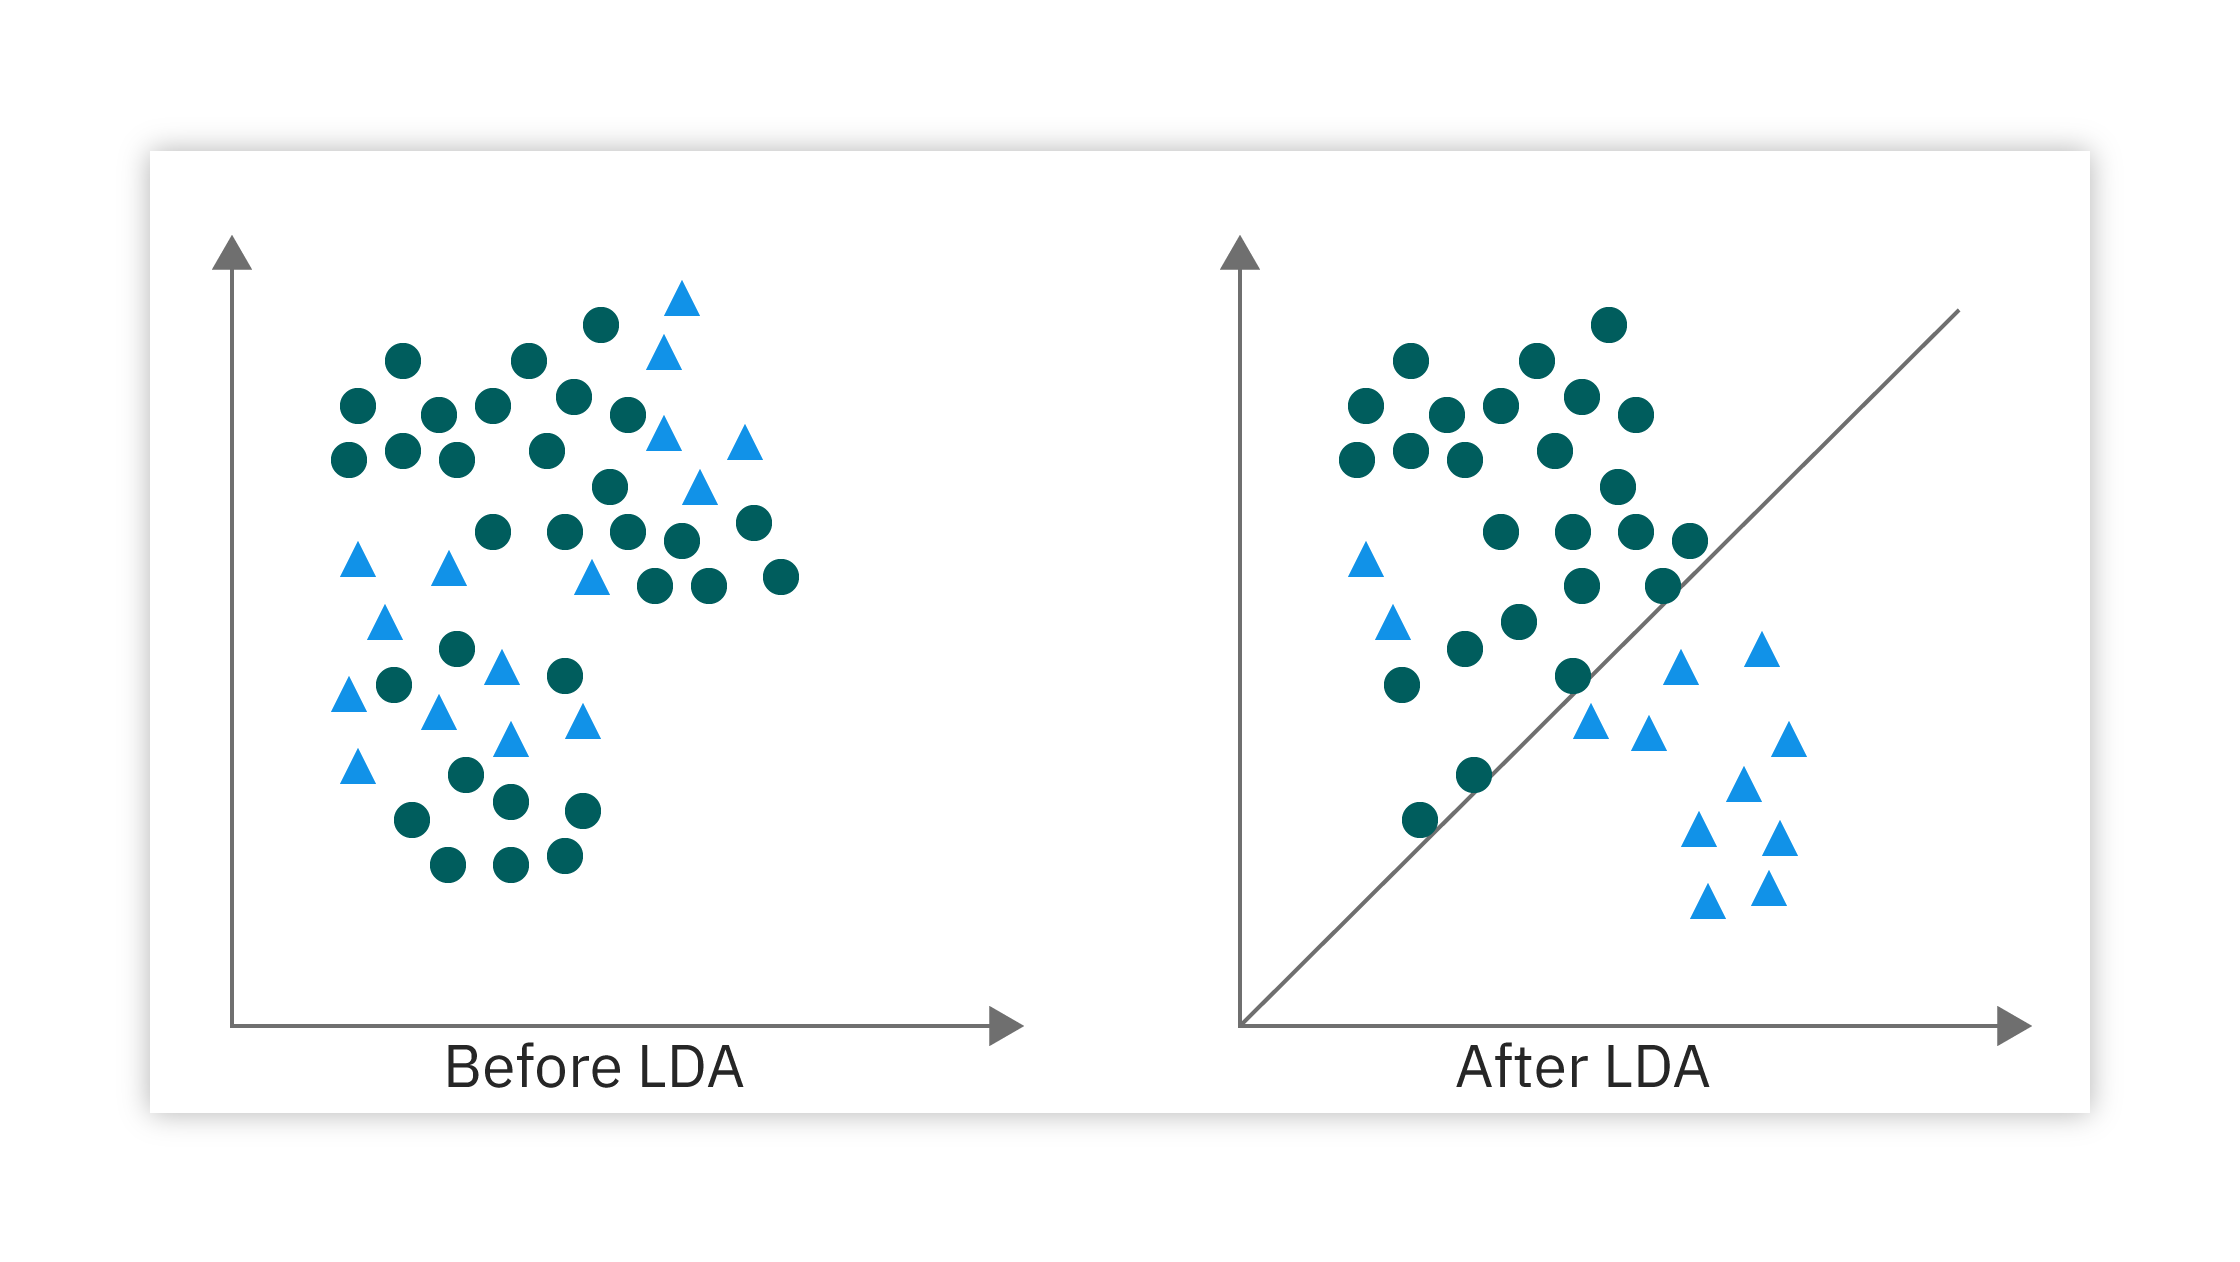

***Research-article***

https://www.researchgate.net/publication/316994943_Linear_discriminant_analysis_A_detailed_tutorial

## Code

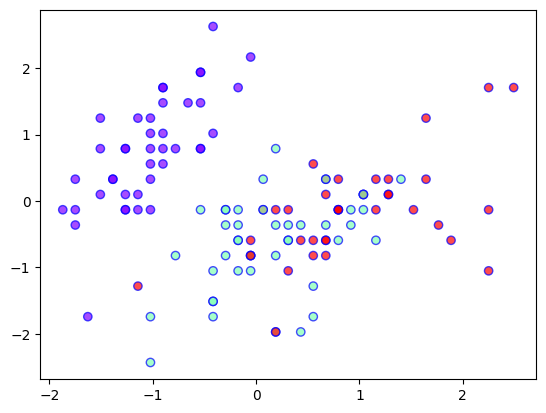

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)
dataset['target'] = iris.target

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)


***Apply Linear Discriminant Analysis***

Accuracy : 0.9
[[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]


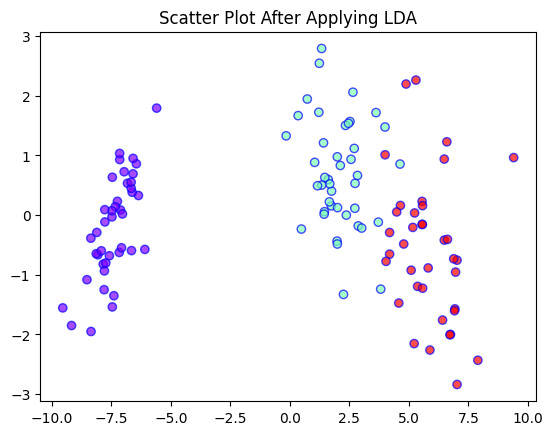

In [16]:

lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b',marker="o"
)
plt.title("Scatter Plot After Applying LDA")

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)